In [2]:
from sklearn.datasets import load_wine

import pandas as pd  #data analysis and manipulation tool, DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. 

import numpy as np   #fundamental package for scientific computing, Arrays in my project

from matplotlib import pyplot as plt #Plotting package

import seaborn as sns #Controlling figure aesthetics
sns.set() #This is for fancy plotting

from sklearn.preprocessing import LabelEncoder
#I used wine dataset from sklearn.dataset library because there was a problem about using my own dataset which i created according to original wine dataset.

#So wine.data means datas from original wine dataset. I removed unnecessary columns(classes) and rows(samples) to obtain two class, 'class_0' and 'class_1' which total they have 130 rows(samples). 

#Basically i manipulated the original wine dataset and created a new dataset for my own sake as wine1 dataset.

In [3]:
wine1 = pd.read_csv('Wine1.csv') # This is the csv file that i constructed. This dataset has two classes("class_0 and class_1") and two features("alcohol" and "malic_acid") 
wine = load_wine() #This is the original wine dataset. I choose this dataset because this dataset is widely used in this area and has so many cites.

In [4]:
wine1.target_names = ('class_0', 'class_1')  
wine1.feature_names = ('alcohol','malic_acid')
wine1.target = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#In python if you import .csv files from your pc, you need to identify the target, target names, feature names and data on your own. 
#In this line python declares an error but it's not a problem for us. It's just a warning.

<ipython-input-4-07c74c09260a>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  wine1.target_names = ('class_0', 'class_1')
<ipython-input-4-07c74c09260a>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  wine1.feature_names = ('alcohol','malic_acid')
<ipython-input-4-07c74c09260a>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  wine1.target = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,


In [5]:
wine.data = np.delete(wine.data, [129,130,131,132,133,134,135,136,137,138,139,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177], axis=0)

#So what i did here is that i removed the "class_2" from original wine dataset. axis = 0 means all the ROWS in each COLUMN.

In [6]:
wine.data.shape

#So original dataset now only has 130 rows i.e samples(Instances) .

(130, 13)

In [7]:
wine.data = np.delete(wine.data, [2,3,4,5,6,7,8,9,10,11,12], axis=1) 

#In this line i removed unnecessary(other classes) columns from the original wine dataset. axis = 1 means all the COLUMNS in each ROW .

In [8]:
wine.data.shape

#Now my desired dataset is ready.

(130, 2)

In [9]:
wine1.data = wine.data

#So i assigned wine.data to wine1.data which i am going to use as my input space.
#Again this is a warning. Code works fine with that too.

<ipython-input-9-ea25e5245b45>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  wine1.data = wine.data


In [10]:
wine1.data.shape

#Our wine1 dataset is ready.

(130, 2)

In [11]:
X = pd.DataFrame(wine1.data, columns=wine1.feature_names)
Y = pd.Categorical.from_codes(wine1.target, wine1.target_names)

#In here, i assign those variables from .csv file to my wine1 dataset.
#DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. 

In [12]:
X
#Now we have 2 classes(columns) and 130 samples(rows).

,alcohol,malic_acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
125,12.07,2.16
126,12.43,1.53
127,11.79,2.13
128,12.37,1.63


In [13]:
Y

['class_0', 'class_0', 'class_0', 'class_0', 'class_0', ..., 'class_1', 'class_1', 'class_1', 'class_1', 'class_1']
Length: 130
Categories (2, object): ['class_0', 'class_1']

In [14]:
df = X.join(pd.Series(Y, name='class'))

#In this line, i created a DataFrame containing both the features and classes.

df
#So our dataset is now ready to proceed.

,alcohol,malic_acid,class
0,14.23,1.71,class_0
1,13.20,1.78,class_0
2,13.16,2.36,class_0
3,14.37,1.95,class_0
4,13.24,2.59,class_0
...,...,...,...
125,12.07,2.16,class_1
126,12.43,1.53,class_1
127,11.79,2.13,class_1
128,12.37,1.63,class_1


In [15]:
#LDA in 5 steps

#Step 1: Computing the d-dimensional mean vectors.
#Step 2: Computing the Scatter Matrices.
#Step 3: Solving the generalized eigenvalue problem S_W(inv).S_B   # (Within-class scatter matrix)^-1 * (Between-class scatter matrix).
#Step 4: Selecting linear discriminants for the new feature subspace.
#Step 5: Transforming the samples onto the new subspace.

In [16]:
#Step 1: Computing the 2-dimensional mean vectors for each class.

class_feature_means = pd.DataFrame(columns=wine1.target_names)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
    
class_feature_means

,class_0,class_1
alcohol,13.744746,12.291268
malic_acid,2.010678,1.911690


In [17]:
#Calculating S_W (Within-class scatter matrix). Dimensions must be equal, which is 2x2.

within_class_scatter_matrix = np.zeros((2,2))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    
    S_W = np.zeros((2,2))


In [18]:
index = 130 
#130 = Number of rows in wine1 dataset.

In [19]:
#According to the S_W (Within-class scatter matrix) formula, we write the necessary code to implement this formula on python
for index, row in rows.iterrows():
        x  = row.values.reshape(2,1)
        mc = class_feature_means[c].values.reshape(2,1)
        
        S_W += (x - mc).dot((x - mc).T)
    
        within_class_scatter_matrix += S_W
print('within_class_scatter_matrix:\n', S_W)

within_class_scatter_matrix:
 [[20.61438592  0.33824789]
 [ 0.33824789 67.33079718]]


In [20]:
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((2,2))
S_B = np.zeros((2,2))

In [21]:
#According to the S_B (Between-class scatter matrix) formula, we write the necessary code to implement this formula on python.
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index)
    
    mc = class_feature_means[c].values.reshape(2,1) 
    m  =  feature_means.values.reshape(2,1)
    
    S_B += (n * (mc - m).dot((mc - m).T))
    
    between_class_scatter_matrix += S_B
    
print('between_class_scatter_matrix:\n', S_B)

between_class_scatter_matrix:
 [[68.07443213  4.6361481 ]
 [ 4.6361481   0.3157407 ]]


In [22]:
#Step 3: Solving the generalized eigenvalue problem S_W(inv).S_B   # (Within-class scatter matrix)^-1 * (Between-class scatter matrix).

#we solve the generalized eigenvalue problem for to obtain the linear discriminants.

eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))
print('Eigenvalues:\n', eigen_values)
print('Eigenvectors:\n', eigen_vectors)

Eigenvalues:
 [0.13147348 0.        ]
Eigenvectors:
 [[ 0.99239568 -0.06794671]
 [ 0.12308868  0.99768895]]


In [23]:
#Step 4: Selecting linear discriminants for the new feature subspace.

#The eigenvectors with the highest eigenvalues carry the most information about the distribution of the data. 
#Thus, we sort the eigenvalues from highest to lowest and select the first two eigenvectors. 
#In order to ensure that the eigenvalue maps to the same eigenvector after sorting, we place them in a temporary array.

pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

0.13147348082931057
0.0


In [24]:
#Let’s express the “explained variance” as percentage.

eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 1.0
Eigenvector 1: 0.0


In [25]:
#Eigenvector matrix W.
#Transformation Matrix

w_matrix = np.hstack((pairs[0][1].reshape(2,1), pairs[1][1].reshape(2,1))).real
print('W_Matrix:\n', w_matrix)

W_Matrix:
 [[ 0.99239568 -0.06794671]
 [ 0.12308868  0.99768895]]


In [26]:
#Step 5: Transforming the samples onto the new subspace.

X_lda = np.array(X.dot(w_matrix))

In [27]:
le = LabelEncoder()
Y = le.fit_transform(df['class'])

#This line is to represent every class as a number so that we can incorporate the class labels into our plot. 

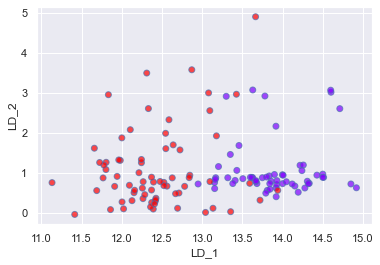

In [29]:
plt.xlabel('LD_1')
plt.ylabel('LD_2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=Y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [28]:
#In conclusion, LinearDiscriminant_1 does it's job very efficiently for my opinion unlike LinearDiscriminant_2.
#LD_1 separates the classes nicely. 
#LD_2 however, doesn't give us any valuable information, which we can conclude when we look at the eigenvalues at step 4.

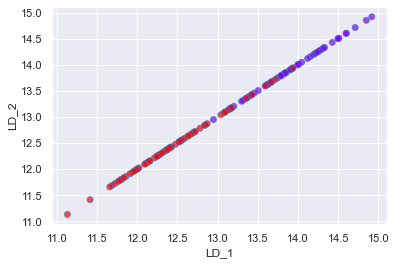

In [30]:
plt.xlabel('LD_1')
plt.ylabel('LD_2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,0],
    c=Y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)